In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pd.set_option("display.max_rows", None,'display.max_columns', None, 'display.width', 1000)
df = pd.read_csv("wireshark1.csv", index_col='No.')

In [3]:
#Data Wrangling
df.loc[df['Protocol'] == 'ARP', 'ProtocolNumber'] = '1'
df.loc[df['Protocol'] == 'UDP', 'ProtocolNumber'] = '2'
df.loc[df['Protocol'] == 'SSDP', 'ProtocolNumber'] = '3'
df.loc[df['Protocol'] == 'TCP', 'ProtocolNumber'] = '4'
df.loc[df['Protocol'] == 'DHCPv6', 'ProtocolNumber'] = '5'
df.loc[df['Protocol'] == 'DNS', 'ProtocolNumber'] = '6'
df.loc[df['Protocol'] == 'HTTP', 'ProtocolNumber'] = '7'
df.loc[df['Protocol'] == 'ICMP', 'ProtocolNumber'] = '8'
df.loc[df['Protocol'] == 'ICMPv6', 'ProtocolNumber'] = '9'
df.loc[df['Protocol'] == 'IGMPv3', 'ProtocolNumber'] = '10'
df.loc[df['Protocol'] == 'LLMNR', 'ProtocolNumber'] = '11'
df.loc[df['Protocol'] == 'MDNS', 'ProtocolNumber'] = '12'
df.loc[df['Protocol'] == 'NTP', 'ProtocolNumber'] = '13'
df.loc[df['Protocol'] == 'XID', 'ProtocolNumber'] = '14'
df.loc[df['Protocol'] == 'BROWSER', 'ProtocolNumber'] = '15'
df.loc[df['Protocol'] == 'NBNS', 'ProtocolNumber'] = '16'

#Assigning each Source IP a ID
df['id'] = df.groupby('Source').ngroup()

#Changing SPort and DPort NaN Values to 0
df['SPort'] = df['SPort'].fillna(0)
df['DPort'] = df['DPort'].fillna(0)

#Converting Values to Int to remove decimal place
df['SPort'] = df['SPort'].astype(int)
df['DPort'] = df['DPort'].astype(int)



#Assigning dfdos to df
dfdos = df

#Creating column total requests
df['Totalrequests'] = df.groupby('Source')['Source'].transform('count')

#Removing Unnecessary data for DOS
dfdos.drop(dfdos.loc[dfdos['Source']=='192.168.0.117'].index, inplace=True)
dfdos.drop(dfdos.loc[dfdos['Source']=='192.168.0.218'].index, inplace=True)
dfdos = dfdos[dfdos['Protocol'] != 'DNS']
dfdos = dfdos[dfdos['Protocol'] != 'ARP']
dfdos = dfdos[dfdos['Protocol'] != 'XID']
dfdos = dfdos[dfdos['Protocol'] != 'NTP']
dfdos = dfdos[dfdos['Protocol'] != 'DHCPv6']
dfdos = dfdos[dfdos['Protocol'] != 'SSDP']
dfdos = dfdos[dfdos['Protocol'] != 'IGMPv3']
dfdos = dfdos[dfdos['Protocol'] != 'MDNS']
dfdos = dfdos[dfdos['Protocol'] != 'LLMNR']
dfdos = dfdos[dfdos['Protocol'] != 'BROWSER']
dfdos = dfdos[dfdos['Protocol'] != 'ICMPv6']
dfdos = dfdos[dfdos['Protocol'] != 'NBNS']
dfdos = dfdos.reset_index(drop=True)

In [119]:
#Function for Elbow Method
df_Short = dfdos[['TimeDiff', 'DPort']]

K= range(1,12)
wss = []
for k in K:
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

C:\Users\donma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


In [44]:
#Viewing the WSS scores of the Clusters
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

Clusters           WSS
0          1  9.390641e+11
1          2  7.816520e+08
2          3  1.769386e+06
3          4  1.291489e+04
4          5  4.262884e+01
5          6  1.445826e+01
6          7  9.123383e+00
7          8  5.109990e+00
8          9  3.409659e+00
9         10  2.725287e+00
10        11  2.141912e+00

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

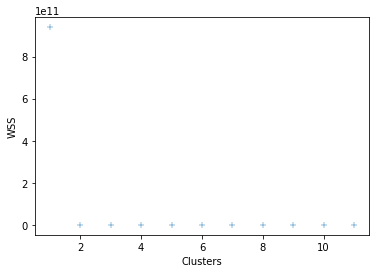

In [45]:
#Plot the Elbow 
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker= "+")

In [46]:
dfdos.sort_values(["id"], ascending=True)

Time                                  Source    Destination Protocol  Length                                               Info      TimeDiff  SPort  DPort ProtocolNumber   id  Totalrequests
558   277.450989                             192.168.0.0  192.168.0.218      UDP      60                                 17532  >  80 Len=0  3.114439e-02  17532     80              2    0              5
1572  402.806121                             192.168.0.0  192.168.0.218      TCP      60            36500  >  80 [SYN] Seq=0 Win=8192 Len=0  2.294087e-02  36500     80              4    0              5
402   199.429770                             192.168.0.0  192.168.0.218      UDP      60                                 31777  >  80 Len=0  3.304979e-02  31777     80              2    0              5
240   122.412599                             192.168.0.0  192.168.0.218      TCP      60            21443  >  80 [SYN] Seq=0 Win=8192 Len=0  3.902611e-02  21443     80              4    0              5
562   279.525918                             192.168.0.0  192.168.0.218      UDP      60                                 45949  >  80 Len=0  6.324618e-03  45949     80              2    0              5
384   192.044642                            192.168.0.10  192.168.0.218      TCP      60             9259  >  80 [SYN] Seq=0 Win=8192 Len=0  3.000968e-02   9259     80              4    2              1
428   211.989565                           192.168.0.100  192.168.0.218      TCP      60            27016  >  80 [SYN] Seq=0 Win=8192 Len=0  1.143590e-01  27016     80              4    3              5
575   285.866866                           192.168.0.100  192.168.0.218      TCP      60            20582  >  80 [SYN] Seq=0 Win=8192 Len=0  1.128981e-02  20582     80              4    3              5
1101  353.296435                           192.168.0.100  192.168.0.218      TCP      60            40981  >  80 [SYN] Seq=0 Win=8192 Len=0  3.228068e-02  40981     80              4    3              5
190    96.523416                           192.168.0.100  192.168.0.218      TCP      60            27520  >  80 [SYN] Seq=0 Win=8192 Len=0  1.220657e-02  27520     80              4    3              5
360   180.749693                           192.168.0.100  192.168.0.218      TCP      60            41895  >  80 [SYN] Seq=0 Win=8192 Len=0  3.117653e-02  41895     80              4    3              5
283   142.314299                           192.168.0.101  192.168.0.218      UDP      60                                 12862  >  80 Len=0  3.116645e-02  12862     80              2    4              2
111    57.109689                           192.168.0.101  192.168.0.218      UDP      60                                 24205  >  80 Len=0  8.948702e-02  24205     80              2    4              2
36     19.643216                           192.168.0.103  192.168.0.218      TCP      60             1788  >  80 [SYN] Seq=0 Win=8192 Len=0  2.775175e-02   1788     80              4    5              2
1565  399.739636                           192.168.0.103  192.168.0.218      TCP      60            28206  >  80 [SYN] Seq=0 Win=8192 Len=0  3.213413e-02  28206     80              4    5              2
314   157.925876                           192.168.0.104  192.168.0.218      UDP      60                                 47121  >  80 Len=0  2.725091e-02  47121     80              2    6              1
1049  349.097691                           192.168.0.105  192.168.0.218      TCP      60            31127  >  80 [SYN] Seq=0 Win=8192 Len=0  7.525086e-03  31127     80              4    7              2
1438  382.098621                           192.168.0.105  192.168.0.218      UDP      60                                 29273  >  80 Len=0  3.852602e-02  29273     80              2    7              2
565   281.616483                           192.168.0.106  192.168.0.218      TCP      60            14457  >  80 [SYN] Seq=0 Win=8192 Len=0  6.048794e-01  

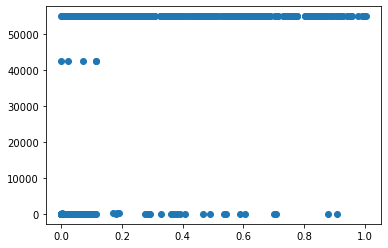

In [47]:
#Scaling the Data

scale = MinMaxScaler()

X = dfdos[['TimeDiff']] 
Y = dfdos[['DPort']]


dfdos[['TimeDiff']] = scale.fit_transform(X)
dfdos[['DPort']] = scale.fit_transform(Y)

plt.scatter(X,Y)


In [48]:
#Creating the Kmeans Clusters and Viewing the data
km = KMeans(n_clusters=4, n_init=25, random_state=0)
y_predicted = km.fit_predict(dfdos[['TimeDiff', 'DPort']])
print(y_predicted)

[2 0 0 ... 1 2 3]


In [49]:
#Assigning the cluster number to their packets

dfdos['cluster'] = y_predicted

dfdos1 = dfdos[dfdos.cluster==0]
dfdos2 = dfdos[dfdos.cluster==1]
dfdos3 = dfdos[dfdos.cluster==2]
dfdos4 = dfdos[dfdos.cluster==3]
dfdos5 = dfdos[dfdos.cluster==4]


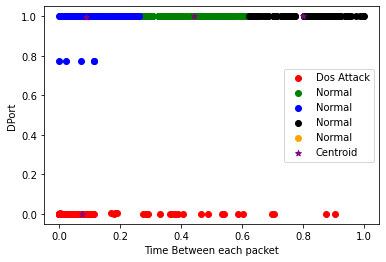

In [50]:
#Displaying the plot of clusters and assigning the clusters a colour

plt.scatter(dfdos1['TimeDiff'],dfdos1['DPort'],color = 'red', label = 'Dos Attack')
plt.scatter(dfdos2['TimeDiff'],dfdos2['DPort'],color = 'green', label = 'Normal')
plt.scatter(dfdos3['TimeDiff'],dfdos3['DPort'],color = 'blue', label = 'Normal')
plt.scatter(dfdos4['TimeDiff'],dfdos4['DPort'],color = 'black', label = 'Normal')
plt.scatter(dfdos5['TimeDiff'],dfdos5['DPort'],color = 'orange', label = 'Normal')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker='*', label='Centroid')
plt.xlabel('Time Between each packet')
plt.ylabel('DPort')
plt.legend()

In [51]:
km.cluster_centers_

array([[7.28841421e-02, 5.21156138e-04],
       [4.41621872e-01, 1.00000000e+00],
       [8.71158142e-02, 9.94337333e-01],
       [8.00908770e-01, 1.00000000e+00]])

In [52]:
dfdos

Time                                  Source    Destination Protocol  Length                                               Info  TimeDiff  SPort     DPort ProtocolNumber   id  Totalrequests  cluster
0       0.022357                   DESKTOP-GSL42P0.local  192.168.0.255      UDP     305                            54915  >  54915 Len=263  0.018439  54915  1.000000              2  211            466        2
1       0.025986                            192.168.0.68  192.168.0.218      TCP      60            23721  >  80 [SYN] Seq=0 Win=8192 Len=0  0.003628  23721  0.001457              4  180              3        0
2       0.061133                            192.168.0.89  192.168.0.218      UDP      60                                 37068  >  80 Len=0  0.035057  37068  0.001457              2  199              1        0
3       1.023599                   DESKTOP-GSL42P0.local  192.168.0.255      UDP     305                            54915  >  54915 Len=263  0.000032  54915  1.000000              2  211            466        2
4       1.092761                           192.168.0.120  192.168.0.218      TCP      60            48903  >  80 [SYN] Seq=0 Win=8192 Len=0  0.004613  48903  0.001457              4   20              3        0
5       1.124921                             192.168.0.2  192.168.0.218      UDP      60                                 40305  >  80 Len=0  0.032078  40305  0.001457              2   90              2        0
6       2.021984                   DESKTOP-GSL42P0.local  192.168.0.255      UDP     305                            54915  >  54915 Len=263  0.223828  54915  1.000000              2  211            466        2
7       3.024237                   DESKTOP-GSL42P0.local  192.168.0.255      UDP     305                            54915  >  54915 Len=263  0.854908  54915  1.000000              2  211            466        3
8       3.163586                            192.168.0.65  192.168.0.218      TCP      60            28712  >  80 [SYN] Seq=0 Win=8192 Len=0  0.026901  28712  0.001457              4  177              2        0
9       4.021652                   DESKTOP-GSL42P0.local  192.168.0.255      UDP     305                            54915  >  54915 Len=263  0.851824  54915  1.000000              2  211            466        3
10      4.206903                            192.168.0.46  192.168.0.218      UDP      60                                 49317  >  80 Len=0  0.015262  49317  0.001457              2  161              3        0
11      5.024923                   DESKTOP-GSL42P0.local  192.168.0.255      UDP     305                            54915  >  54915 Len=263  0.816114  54915  1.000000              2  211            466        3
12      6.020367                   DESKTOP-GSL42P0.local  192.168.0.255      UDP     305                            54915  >  54915 Len=263  0.802132  54915  1.000000              2  211            466        3
13      6.249468                            192.168.0.13  192.168.0.218      TCP      60            17324  >  80 [SYN] Seq=0 Win=8192 Len=0  0.010251  17324  0.001457              4   29              3        0
14      7.024614                   DESKTOP-GSL42P0.local  192.168.0.255      UDP     305                            54915  >  54915 Len=263  0.773341  54915  1.000000              2  211            466        3
15      8.022954                   DESKTOP-GSL42P0.local  192.168.0.255      UDP     305                            54915  >  54915 Len=263  0.757341  54915  1.000000              2  211            466        3
16      8.305186                           192.168.0.151  192.168.0.218      UDP      60                                  2843  >  80 Len=0  0.017534   2843  0.001457              2   49              3        0
17      9.020410                   DESKTOP-GSL42P0.local  192.168.0.255      UDP     305                            54915  >  54915 Len=263  0.713555  54915  1.000000              2  211            466        3
18 

In [120]:
from sklearn.preprocessing import StandardScaler
df_Short = dfdos[['TimeDiff', 'Totalrequests', 'SPort', 'DPort', 'id']]
scale = StandardScaler()

scaled_dfdos = scale.fit_transform(df_Short)



In [121]:
scaled_dfdos

array([[-0.56440336,  1.18899018, -0.66227413, -0.38399504,  0.82290319],
       [-0.54561082,  1.18899018, -0.66227413, -0.38399504,  0.82290319],
       [-0.47495846, -0.41553618,  1.90693394,  2.727244  ,  0.77303552],
       ...,
       [-0.563872  , -0.62856652,  1.29021172, -0.27634951, -1.83255003],
       [-0.56375332, -0.62856652,  1.29021172, -0.27634951, -1.83255003],
       [ 4.04011075, -0.41553618,  1.90693394,  2.727244  ,  0.77303552]])

In [122]:
pca = PCA()
pca.fit(scaled_dfdos)


PCA()

In [123]:
pca.explained_variance_ratio_

array([0.41079745, 0.31747629, 0.1392107 , 0.10126215, 0.03125341])

In [124]:
pca = PCA(n_components = 5)

In [125]:
pca.fit(scaled_dfdos)

PCA(n_components=5)

In [126]:
pca.transform(scaled_dfdos)

array([[-1.26247628,  0.92634412, -0.55627082, -0.4585241 , -0.15439008],
       [-1.25628148,  0.93486354, -0.54230334, -0.45177013, -0.15561336],
       [ 2.84331625,  0.41785528, -1.66042368, -0.95400894,  0.37935001],
       ...,
       [ 0.69906323, -2.0728669 ,  0.53086747, -0.76550378, -0.39877257],
       [ 0.69910235, -2.0728131 ,  0.53095568, -0.76546113, -0.39878029],
       [ 4.33167108,  2.46472154,  1.69538447,  0.66869264,  0.08544593]])

In [127]:
scores_pca = pca.transform(scaled_dfdos)

In [128]:
scores_pca

array([[-1.26247628,  0.92634412, -0.55627082, -0.4585241 , -0.15439008],
       [-1.25628148,  0.93486354, -0.54230334, -0.45177013, -0.15561336],
       [ 2.84331625,  0.41785528, -1.66042368, -0.95400894,  0.37935001],
       ...,
       [ 0.69906323, -2.0728669 ,  0.53086747, -0.76550378, -0.39877257],
       [ 0.69910235, -2.0728131 ,  0.53095568, -0.76546113, -0.39878029],
       [ 4.33167108,  2.46472154,  1.69538447,  0.66869264,  0.08544593]])

In [129]:
wcss = []

for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\donma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


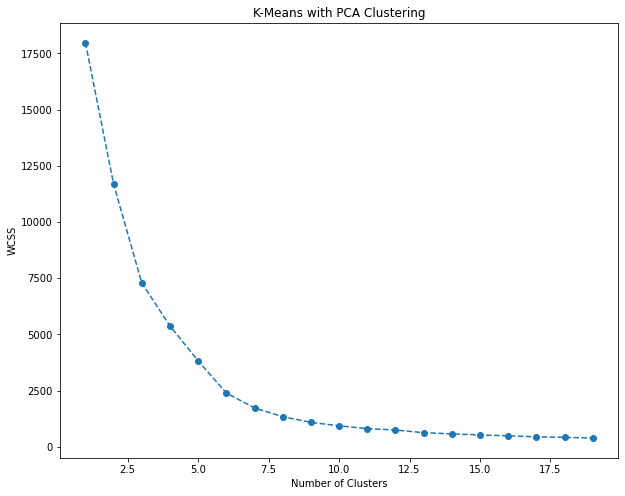

In [130]:
plt.figure(figsize = (10,8))
plt.plot(range(1,20), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA Clustering')
plt.show()

In [131]:
kmeans_pca = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0)

In [132]:
dfdos_pca_kmeans = pd.concat([dfdos.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
dfdos_pca_kmeans.columns.values[-5: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']
kmeans_pca.fit(scores_pca)
dfdos_pca_kmeans['Clusters'] = kmeans_pca.labels_

C:\Users\donma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


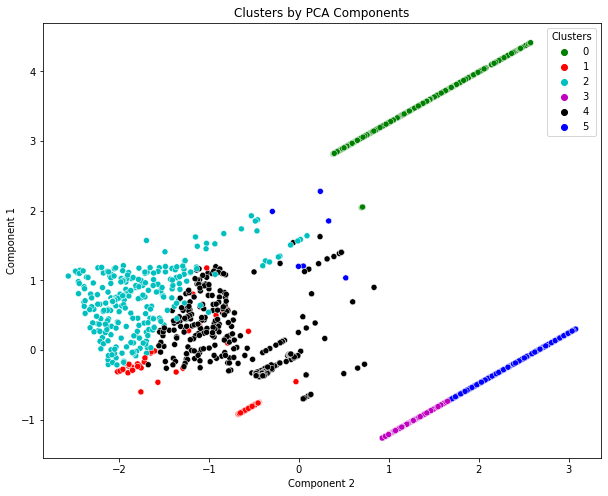

In [133]:
x_axis = dfdos_pca_kmeans['Component 2']
y_axis = dfdos_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = dfdos_pca_kmeans['Clusters'], palette = ['g', 'r', 'c', 'm', 'black', 'blue'])
plt.title('Clusters by PCA Components')
plt.show()

In [137]:
dfdos_pca_kmeans1

Time                 Source      Destination Protocol  Length                     Info  TimeDiff  SPort  DPort ProtocolNumber   id  Totalrequests  Component 1  Component 2  Component 3  Component 4  Component 5  Clusters
2       0.022357  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.018475  54915  54915              2  210            466     2.843316     0.417855    -1.660424    -0.954009     0.379350         0
8       1.023599  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.000025  54915  54915              2  210            466     2.813872     0.377362    -1.726813    -0.986111     0.385164         0
23      2.021984  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.224342  54915  54915              2  210            466     3.171860     0.869686    -0.919653    -0.595809     0.314473         0
29      3.024237  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.856890  54915  54915              2  210            466     4.181347     2.257988     1.356447     0.504800     0.115130         0
34      4.021652  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.853799  54915  54915              2  210            466     4.176414     2.251203     1.345324     0.499421     0.116104         0
38      5.024923  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.818006  54915  54915              2  210            466     4.119292     2.172646     1.216530     0.437143     0.127384         0
41      6.020367  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.803992  54915  54915              2  210            466     4.096927     2.141888     1.166104     0.412759     0.131801         0
45      7.024614  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.775133  54915  54915              2  210            466     4.050871     2.078550     1.062262     0.362546     0.140895         0
47      8.022954  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.759096  54915  54915              2  210            466     4.025277     2.043351     1.004554     0.334642     0.145949         0
51      9.020410  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.715208  54915  54915              2  210            466     3.955236     1.947028     0.846633     0.258279     0.159780         0
55     10.023679  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.687345  54915  54915              2  210            466     3.910768     1.885873     0.746371     0.209797     0.168561         0
59     11.021073  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.649274  54915  54915              2  210            466     3.850011     1.802316     0.609380     0.143555     0.180559         0
61     12.024312  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.633135  54915  54915              2  210            466     3.824256     1.766896     0.551310     0.115475     0.185645         0
66     13.024632  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.577981  54915  54915              2  210            466     3.736235     1.645845     0.352849     0.019509     0.203026         0
71     14.023995  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.541867  54915  54915              2  210            466     3.678600     1.566583     0.222898    -0.043328     0.214407         0
81     15.022429  DESKTOP-GSL42P0.local    192.168.0.255      UDP     305  54915  >  54915 Len=263  0.526842  54915  54915              2  210            466     3.654621     1.533606     0.168833    -0.069472     0.219142         0
87     16.019822  DESKTOP-GSL42P0.local    192.168.

In [135]:
dfdos_pca_kmeans1 = dfdos_pca_kmeans[dfdos_pca_kmeans.Clusters==0]

C:\Users\donma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Component 2', ylabel='Component 1'>

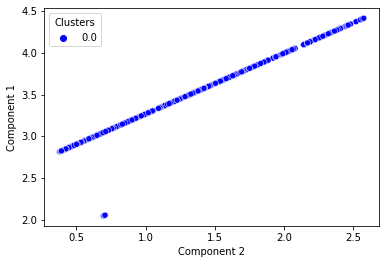

In [136]:
sns.scatterplot(x_axis, y_axis, hue = dfdos_pca_kmeans1['Clusters'], palette = ['b'])

In [41]:
dfdos_pca_kmeans1

Time                 Source     Destination Protocol  Length                                               Info      TimeDiff  SPort  DPort ProtocolNumber   id  Totalrequests  Component 1  Component 2  Component 3  Component 4  Clusters
17      1.612221          192.168.0.218  igmp.mcast.net   IGMPv3      54  Membership Report / Join group 224.0.0.251 for...  4.699613e-02      0      0             10  107            798    -0.767702     0.078149    -0.026832     0.133747         0
21      1.721607  DESKTOP-GSL42P0.local  igmp.mcast.net   IGMPv3      70  Membership Report / Join group 224.0.0.251 for...  2.455885e-02      0      0             10  211            466    -0.518739    -0.574944     0.348071     0.383469         0
22      1.723496  DESKTOP-GSL42P0.local        ff02::16   ICMPv6     150               Multicast Listener Report Message v2  1.888815e-03      0      0              9  211            466    -0.561096    -0.652746     0.270850     0.393272         0
767   116.390823  DESKTOP-GSL42P0.local       ff02::1:2   DHCPv6     120  Information-request XID: 0x1f9107 CID: 0001000...  2.044485e-01    546    547              5  211            466    -0.145593     0.044446     0.938690     0.307295         0
768   116.392944  DESKTOP-GSL42P0.local        ff02::16   ICMPv6      90               Multicast Listener Report Message v2  2.121670e-03      0      0              9  211            466    -0.560661    -0.651946     0.271643     0.393171         0
769   116.392944  DESKTOP-GSL42P0.local  igmp.mcast.net   IGMPv3      60        Membership Report / Leave group 224.0.0.252  6.800000e-08      0      0             10  211            466    -0.564625    -0.659228     0.264416     0.394089         0
772   116.396204  DESKTOP-GSL42P0.local        ff02::16   ICMPv6      90               Multicast Listener Report Message v2  1.792073e-03      0      0              9  211            466    -0.561277    -0.653078     0.270520     0.393314         0
773   116.396261  DESKTOP-GSL42P0.local  igmp.mcast.net   IGMPv3      60  Membership Report / Join group 224.0.0.252 for...  5.660500e-05      0      0             10  211            466    -0.564520    -0.659034     0.264608     0.394064         0
774   116.396723  DESKTOP-GSL42P0.local     224.0.0.251     MDNS      81  Standard query 0x0000 ANY DESKTOP-GSL42P0.loca...  4.623760e-04   5353   5353             12  211            466    -0.201052    -0.637950     0.049156     0.409308         0
775   116.396779  DESKTOP-GSL42P0.local     224.0.0.251     MDNS     139  Standard query response 0x0000 A, cache flush ...  5.568000e-05   5353   5353             12  211            466    -0.201812    -0.639346     0.047771     0.409484         0
776   116.396903  DESKTOP-GSL42P0.local        ff02::fb     MDNS     101  Standard query 0x0000 ANY DESKTOP-GSL42P0.loca...  1.244680e-04   5353   5353             12  211            466    -0.201684    -0.639110     0.048005     0.409454         0
777   116.397058  DESKTOP-GSL42P0.local     224.0.0.251     MDNS     119  Standard query response 0x0000 AAAA fe80::604c...  1.551460e-04   5353   5353             12  211            466    -0.201626    -0.639005     0.048110     0.409441         0
779   116.397116  DESKTOP-GSL42P0.local        ff02::fb     MDNS     139  Standard query response 0x0000 AAAA fe80::604c...  5.300000e-08   5353   5353             12  211            466    -0.201916    -0.639537     0.047581     0.409508         0
781   116.397284  DESKTOP-GSL42P0.local     224.0.0.251     MDNS      81  Standard query 0x0000 ANY DESKTOP-GSL42P0.loca...  1.314000e-04   5353   5353             12  211            466    -0.201671    -0.639086     0.048029     0.409451         0
782   116.397398  DESKTOP-GSL42P0.local        ff02::fb     MDNS     101  Standard query 0x0000 ANY DESKTOP-GSL42P0.loca...  1.142880e-04   5353   5353             12  211            466    -0.201703    -0.639145     0.047970     0.409459         0
783   116.397572  DESKTOP-GS

In [138]:
dfdos_pca_kmeans2 = dfdos_pca_kmeans[dfdos_pca_kmeans.Clusters==1]
dfdos_pca_kmeans2

Time         Source            Destination Protocol  Length                                               Info      TimeDiff  SPort  DPort ProtocolNumber  id  Totalrequests  Component 1  Component 2  Component 3  Component 4  Component 5  Clusters
15      1.564908    192.168.0.1  all-systems.mcast.net   IGMPv3      60                          Membership Query, general  4.399668e-01      0      0             10   1            372     0.101500    -0.794380     2.277144     0.683591     0.704663         1
19      1.697048  192.168.0.121         igmp.mcast.net   IGMPv3      70  Membership Report / Join group 224.0.0.251 for...  5.749519e-02      0      0             10  21             18    -0.229619    -1.895348     0.605958     0.705178     0.843910         1
28      2.167347  192.168.0.137         igmp.mcast.net   IGMPv3      60  Membership Report / Join group 239.255.255.250...  2.324218e-02      0      0             10  35             22    -0.289044    -1.852256     0.380382     0.702802     0.801882         1
49      8.305186  192.168.0.151          192.168.0.218      UDP      60                                  2843  >  80 Len=0  1.756819e-02   2843     80              2  49              3    -0.197739    -1.795994     0.237642     0.743032     0.670394         1
62     12.414545  192.168.0.132          192.168.0.218      TCP      60              828  >  80 [SYN] Seq=0 Win=8192 Len=0  3.902330e-01    828     80              4  32              1     0.340916    -1.101856     1.710719     1.348773     0.679771         1
667   100.688942  192.168.0.156          192.168.0.218      TCP      60             2599  >  80 [SYN] Seq=0 Win=8192 Len=0  3.918001e-02   2599     80              4  52              3    -0.170803    -1.722255     0.293936     0.798168     0.660168         1
767   116.394412    192.168.0.1            224.0.0.252   IGMPv3      60   Membership Query, specific for group 224.0.0.252  3.672410e-04      0      0             10   1            372    -0.600060    -1.759202     0.695331    -0.081294     0.843199         1
782   116.439346  192.168.0.121         igmp.mcast.net   IGMPv3      60  Membership Report / Join group 224.0.0.252 for...  1.994731e-02      0      0             10  21             18    -0.289542    -1.977757     0.470849     0.639847     0.855743         1
789   117.403579    192.168.0.1            224.0.0.252   IGMPv3      60   Membership Query, specific for group 224.0.0.252  2.133897e-01      0      0             10   1            372    -0.260096    -1.291665     1.461850     0.289356     0.776067         1
797   118.259298  192.168.0.121         igmp.mcast.net   IGMPv3      60  Membership Report / Join group 224.0.0.252 for...  2.769824e-02      0      0             10  21             18    -0.277172    -1.960746     0.498739     0.653333     0.853301         1
870   126.563554    192.168.0.1  all-systems.mcast.net   IGMPv3      60                          Membership Query, general  5.455582e-01      0      0             10   1            372     0.270014    -0.562630     2.657094     0.867316     0.671387         1
878   126.669515  192.168.0.121         igmp.mcast.net   IGMPv3      70  Membership Report / Join group 224.0.0.251 for...  1.402710e-02      0      0             10  21             18    -0.298990    -1.990751     0.449547     0.629546     0.857609         1
881   126.679639  192.168.0.137         igmp.mcast.net   IGMPv3      60  Membership Report / Join group 239.255.255.250...  1.812410e-04      0      0             10  35             22    -0.325847    -1.902870     0.297401     0.662677     0.809149         1
1257  180.718505  192.168.0.142          192.168.0.218      UDP      60                                  1726  >  80 Len=0  1.515779e-02   1726     80              2  40              2    -0.232809    -1.866334     0.299103     0.716932     0.739859         1
1289  187.198818  192.168.0.121          192.168.0.255     NBNS      92                        Name query NB WOR

In [139]:
dfdos_pca_kmeans3 = dfdos_pca_kmeans[dfdos_pca_kmeans.Clusters==2]
dfdos_pca_kmeans3

Time                 Source      Destination Protocol  Length                                       Info      TimeDiff  SPort  DPort ProtocolNumber   id  Totalrequests  Component 1  Component 2  Component 3  Component 4  Component 5  Clusters
11      1.092761          192.168.0.120    192.168.0.218      TCP      60    48903  >  80 [SYN] Seq=0 Win=8192 Len=0  4.616368e-03  48903     80              4   20              3     1.147009    -2.434768     0.253627    -0.134587    -0.668073         2
13      1.124921            192.168.0.2    192.168.0.218      UDP      60                         40305  >  80 Len=0  3.214573e-02  40305     80              2   90              2     0.929572    -1.738077    -0.139095     0.369654    -0.664734         2
36      4.206903           192.168.0.46    192.168.0.218      UDP      60                         49317  >  80 Len=0  1.529024e-02  49317     80              2  160              3     1.160497    -1.279885    -0.749117     0.517028    -1.202228         2
43      6.249468           192.168.0.13    192.168.0.218      TCP      60    17324  >  80 [SYN] Seq=0 Win=8192 Len=0  1.026784e-02  17324     80              4   29              3     0.221117    -2.092120     0.311875     0.411783     0.290852         2
53      9.336322          192.168.0.162    192.168.0.218      TCP      60    10000  >  80 [SYN] Seq=0 Win=8192 Len=0  2.493273e-02  10000     80              4   58              1     0.026246    -1.767583     0.172730     0.688043     0.410036         2
58     10.371787          192.168.0.121    192.168.0.218      UDP      60                         37753  >  80 Len=0  4.438092e-03  37753     80              2   21             18     0.804940    -2.318257     0.288749     0.019354    -0.324682         2
99     19.643216          192.168.0.103    192.168.0.218      TCP      60     1788  >  80 [SYN] Seq=0 Win=8192 Len=0  2.775175e-02   1788     80              4    5              2    -0.206929    -2.122906     0.604159     0.577987     0.863378         2
116    21.717055           192.168.0.18    192.168.0.218      TCP      60    42443  >  80 [SYN] Seq=0 Win=8192 Len=0  2.100027e-02  42443     80              4   72              2     0.977043    -1.925865    -0.052606     0.234493    -0.661949         2
121    22.748579          192.168.0.180    192.168.0.218      UDP      60                         17746  >  80 Len=0  2.875171e-02  17746     80              2   73              3     0.258133    -1.698329     0.050199     0.638322     0.109019         2
126    23.784150           192.168.0.46    192.168.0.218      TCP      60    47246  >  80 [SYN] Seq=0 Win=8192 Len=0  8.403056e-03  47246     80              4  160              3     1.088259    -1.278127    -0.767029     0.537536    -1.134870         2
133    25.835620          192.168.0.220    192.168.0.218      UDP      60                         47793  >  80 Len=0  1.233681e-02  47793     80              2  109              1     1.118056    -1.689746    -0.376739     0.306189    -0.964191         2
135    25.866704          192.168.0.237    192.168.0.218      TCP      60    34472  >  80 [SYN] Seq=0 Win=8192 Len=0  3.106807e-02  34472     80              4  124              4     0.749926    -1.414922    -0.375314     0.611240    -0.607058         2
157    28.754463            192.168.0.1  239.255.255.250     SSDP     440                         NOTIFY * HTTP/1.1   7.345252e-01  41733   1900              3    1            372     1.871121    -0.460990     3.173517     0.512350    -0.630218         2
158    28.754683            192.168.0.1  239.255.255.250     SSDP     512                         NOTIFY * HTTP/1.1   2.193780e-04  41733   1900              3    1            372     0.699238    -2.072626     0.531262    -0.765313    -0.398807         2
159    28.754896            192.168.0.1  239.255.255.250     SSDP     449                         NOTIFY * HTTP/1.1   2.129650e-04  41733   1900              3    1            372     0.6

In [141]:
dfdos_pca_kmeans4 = dfdos_pca_kmeans[dfdos_pca_kmeans.Clusters==3]
dfdos_pca_kmeans4

Time             Source        Destination Protocol  Length                                       Info  TimeDiff  SPort  DPort ProtocolNumber   id  Totalrequests  Component 1  Component 2  Component 3  Component 4  Component 5  Clusters
0       0.000000  PcsCompu_bd:40:f6          Broadcast      ARP      42  Who has 192.168.0.148? Tell 192.168.0.218  0.000000      0      0              1  214           1174    -1.262476     0.926344    -0.556271    -0.458524    -0.154390         3
1       0.003882  PcsCompu_bd:40:f6          Broadcast      ARP      42   Who has 192.168.0.59? Tell 192.168.0.218  0.003882      0      0              1  214           1174    -1.256281     0.934864    -0.542303    -0.451770    -0.155613         3
4       0.026002  PcsCompu_bd:40:f6          Broadcast      ARP      42   Who has 192.168.0.68? Tell 192.168.0.218  0.000015      0      0              1  214           1174    -1.262452     0.926378    -0.556216    -0.458498    -0.154395         3
6       0.061151  PcsCompu_bd:40:f6          Broadcast      ARP      42   Who has 192.168.0.89? Tell 192.168.0.218  0.000018      0      0              1  214           1174    -1.262447     0.926385    -0.556204    -0.458492    -0.154396         3
9       1.055938  PcsCompu_bd:40:f6          Broadcast      ARP      42   Who has 192.168.0.68? Tell 192.168.0.218  0.032339      0      0              1  214           1174    -1.210866     0.997321    -0.439905    -0.402255    -0.164581         3
10      1.088145  PcsCompu_bd:40:f6          Broadcast      ARP      42   Who has 192.168.0.89? Tell 192.168.0.218  0.032207      0      0              1  214           1174    -1.211077     0.997031    -0.440380    -0.402485    -0.164540         3
12      1.092776  PcsCompu_bd:40:f6          Broadcast      ARP      42  Who has 192.168.0.120? Tell 192.168.0.218  0.000014      0      0              1  214           1174    -1.262453     0.926376    -0.556219    -0.458499    -0.154395         3
14      1.124941  PcsCompu_bd:40:f6          Broadcast      ARP      42    Who has 192.168.0.2? Tell 192.168.0.218  0.000020      0      0              1  214           1174    -1.262445     0.926387    -0.556200    -0.458490    -0.154396         3
24      2.083595  PcsCompu_bd:40:f6          Broadcast      ARP      42   Who has 192.168.0.68? Tell 192.168.0.218  0.061612      0      0              1  214           1174    -1.164150     1.061568    -0.334574    -0.351322    -0.173806         3
25      2.111901  PcsCompu_bd:40:f6          Broadcast      ARP      42  Who has 192.168.0.120? Tell 192.168.0.218  0.028306      0      0              1  214           1174    -1.217303     0.988469    -0.454419    -0.409273    -0.163310         3
26      2.111927  PcsCompu_bd:40:f6          Broadcast      ARP      42   Who has 192.168.0.89? Tell 192.168.0.218  0.000026      0      0              1  214           1174    -1.262435     0.926401    -0.556178    -0.458479    -0.154398         3
27      2.144105  PcsCompu_bd:40:f6          Broadcast      ARP      42    Who has 192.168.0.2? Tell 192.168.0.218  0.032178      0      0              1  214           1174    -1.211123     0.996968    -0.440484    -0.402535    -0.164531         3
30      3.136629  PcsCompu_bd:40:f6          Broadcast      ARP      42  Who has 192.168.0.120? Tell 192.168.0.218  0.112392      0      0              1  214           1174    -1.083110     1.173019    -0.151851    -0.262967    -0.189809         3
32      3.163602  PcsCompu_bd:40:f6          Broadcast      ARP      42   Who has 192.168.0.65? Tell 192.168.0.218  0.000016      0      0              1  214           1174    -1.262451     0.926379    -0.556213    -0.458496    -0.154395         3
33      3.167853  PcsCompu_bd:40:f6          Broadcast      ARP      42    Who has 192.168.0.2? Tell 192.168.0.218  0.004251      0      0              1  214           1174    -1.255692     0.935675    -0.540973    -0.451127    -0.155730         3
35      4.191613  PcsCompu_b

In [168]:
dfdos_pca_kmeans5 = dfdos_pca_kmeans[dfdos_pca_kmeans.Clusters==4]
dfdos_pca_kmeans5

NameError: name 'dfdos_pca_kmeans' is not defined

In [150]:
dfdos_pca_kmeans6 = dfdos_pca_kmeans[dfdos_pca_kmeans.Clusters==5]
dfdos_pca_kmeans6

NameError: name 'dfdos_pca_kmeans' is not defined

In [4]:
from sklearn.preprocessing import StandardScaler
df_Short = dfdos[['Time', 'TimeDiff', 'ProtocolNumber', 'Totalrequests', 'id']]
scale = StandardScaler()

scaled_dfdos = scale.fit_transform(df_Short)

In [5]:
#Function for Elbow Method
df_Short2 = scaled_dfdos

K= range(1,12)
wss = []
for k in K:
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans=kmeans.fit(df_Short2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

C:\Users\donma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [31]:
#Viewing the WSS scores of the Clusters
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

Clusters          WSS
0          1  8020.000000
1          2  3960.362483
2          3  2386.142232
3          4  1655.566812
4          5  1308.133647
5          6  1077.723804
6          7   918.138501
7          8   802.943246
8          9   693.649889
9         10   604.913434
10        11   565.305311

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

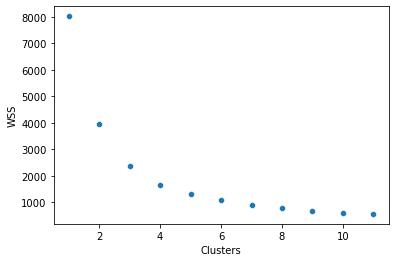

In [32]:
#Plot the Elbow 
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters,  marker = 'o')

In [29]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(scaled_dfdos)
y_predicted

array([0, 2, 2, ..., 3, 0, 3])

In [30]:
dfdos['cluster']=y_predicted
dfdoscheck = dfdos[dfdos.cluster==1]
dfdoscheck = dfdoscheck.reset_index(drop=True)
dfdoscheck

Time         Source    Destination Protocol  Length                                               Info  TimeDiff  SPort  DPort ProtocolNumber  id  Totalrequests  cluster
0    314.479227  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=0/0, ttl=6...  0.292658      0      0              8  77            763        1
1    314.579684  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=256/1, ttl...  0.100327      0      0              8  77            763        1
2    314.680215  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=512/2, ttl...  0.100520      0      0              8  77            763        1
3    314.780744  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=768/3, ttl...  0.100517      0      0              8  77            763        1
4    314.883234  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=1024/4, tt...  0.035189      0      0              8  77            763        1
5    314.986682  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=1280/5, tt...  0.103439      0      0              8  77            763        1
6    315.087220  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=1536/6, tt...  0.074428      0      0              8  77            763        1
7    315.190670  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=1792/7, tt...  0.103439      0      0              8  77            763        1
8    315.293144  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=2048/8, tt...  0.102462      0      0              8  77            763        1
9    315.394640  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=2304/9, tt...  0.101485      0      0              8  77            763        1
10   315.495153  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=2560/10, t...  0.100501      0      0              8  77            763        1
11   315.598616  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=2816/11, t...  0.103455      0      0              8  77            763        1
12   315.700128  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=3072/12, t...  0.101501      0      0              8  77            763        1
13   315.800660  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=3328/13, t...  0.100521      0      0              8  77            763        1
14   315.901180  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=3584/14, t...  0.029355      0      0              8  77            763        1
15   316.002682  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=3840/15, t...  0.101495      0      0              8  77            763        1
16   316.103199  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=4096/16, t...  0.092020      0      0              8  77            763        1
17   316.203734  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=4352/17, t...  0.100522      0      0              8  77            763        1
18   316.304244  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=4608/18, t...  0.100497      0      0              8  77            763        1
19   316.405753  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=4864/19, t...  0.101498      0      0              8  77            763        1
20   316.506270  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=5120/20, t...  0.100505      0      0              8  77            763        1
21   316.609739  192.168.0.18

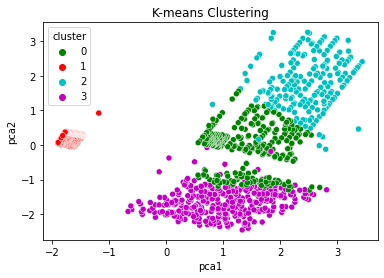

In [11]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=5).fit_transform(scaled_dfdos)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3','pca4','pca5'])

sns.scatterplot(x="pca1", y="pca2", hue=dfdos['cluster'], palette = ['g', 'r', 'c', 'm'], data=results)
plt.title('K-means Clustering')
plt.show()

In [13]:
pca = PCA()
pca.fit(scaled_dfdos)
pca.explained_variance_ratio_

array([0.55988184, 0.24078799, 0.10680378, 0.07796032, 0.01456607])